## Paso 0 – Configuración inicial y preparación de datos (MNIST)

En este paso vamos a:
- Importar las librerías necesarias.
- Cargar el conjunto de datos MNIST desde Keras.
- Normalizar las imágenes para que sus valores estén entre 0 y 1.
- Darles la forma adecuada para usarlas en una red neuronal convolucional (28×28×1).
- Separar un subconjunto de validación a partir de los datos de entrenamiento.
- Codificar las etiquetas en formato one-hot, con 10 clases (dígitos 0–9).

Esto dejará listos los datos `x_train`, `y_train_cat`, `x_val`, `y_val_cat`, `x_test`, `y_test_cat` para los pasos siguientes.


In [1]:
# Paso 0 – Configuración inicial y preparación de datos (MNIST)

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# -------------------------------------------------------------------
# 1. Cargar el dataset MNIST
# -------------------------------------------------------------------
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Shapes originales:")
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_test :", x_test.shape)
print("y_test :", y_test.shape)

# -------------------------------------------------------------------
# 2. Normalizar imágenes a [0, 1] y convertir a float32
# -------------------------------------------------------------------
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# -------------------------------------------------------------------
# 3. Añadir canal (para usar CNN: 28x28x1)
# -------------------------------------------------------------------
# x_train: (60000, 28, 28) -> (60000, 28, 28, 1)
# x_test : (10000, 28, 28) -> (10000, 28, 28, 1)
x_train = np.expand_dims(x_train, axis=-1)
x_test  = np.expand_dims(x_test, axis=-1)

print("\nShapes después de añadir canal:")
print("x_train:", x_train.shape)
print("x_test :", x_test.shape)

# -------------------------------------------------------------------
# 4. Separar conjunto de validación
#    Usaremos 50,000 para entrenamiento y 10,000 para validación
# -------------------------------------------------------------------
x_val = x_train[50000:]
y_val = y_train[50000:]

x_train = x_train[:50000]
y_train = y_train[:50000]

print("\nShapes después de separar validación:")
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_val  :", x_val.shape)
print("y_val  :", y_val.shape)

# -------------------------------------------------------------------
# 5. One-hot encoding de las etiquetas (10 clases: 0–9)
# -------------------------------------------------------------------
num_classes = 10

y_train_cat = to_categorical(y_train, num_classes)
y_val_cat   = to_categorical(y_val, num_classes)
y_test_cat  = to_categorical(y_test, num_classes)

print("\nShapes de etiquetas codificadas (one-hot):")
print("y_train_cat:", y_train_cat.shape)
print("y_val_cat  :", y_val_cat.shape)
print("y_test_cat :", y_test_cat.shape)

# -------------------------------------------------------------------
# 6. Comprobación rápida de rangos de píxeles
# -------------------------------------------------------------------
print("\nRango de valores de x_train (min, max):",
      float(x_train.min()), float(x_train.max()))
print("Rango de valores de x_test  (min, max):",
      float(x_test.min()), float(x_test.max()))


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Shapes originales:
x_train: (60000, 28, 28)
y_train: (60000,)
x_test : (10000, 28, 28)
y_test : (10000,)

Shapes después de añadir canal:
x_train: (60000, 28, 28, 1)
x_test : (10000, 28, 28, 1)

Shapes después de separar validación:
x_train: (50000, 28, 28, 1)
y_train: (50000,)
x_val  : (10000, 28, 28, 1)
y_val  : (10000,)

Shapes de etiquetas codificadas (one-hot):
y_train_cat: (50000, 10)
y_val_cat  : (10000, 10)
y_test_cat : (10000, 10)

Rango de valores de x_train (min, max): 0.0 1.0
Rango de valores de x_test  (min, max): 0.0 1.0


## Paso 1 – Definición y entrenamiento del modelo base

En este paso vamos a definir y entrenar un **modelo base** para clasificar los dígitos del 0 al 9 usando el conjunto de datos MNIST que preparamos en el Paso 0.

Usaremos una **red neuronal convolucional (CNN)** sencilla, ya que este tipo de red aprovecha mejor la estructura espacial de las imágenes. Entrenaremos el modelo con los datos de entrenamiento (`x_train`, `y_train_cat`) y mediremos su desempeño en el conjunto de validación (`x_val`, `y_val_cat`).

Al final:
- Obtendremos el historial de entrenamiento (`history_base`).
- Graficaremos la **exactitud (accuracy)** y la **pérdida (loss)** para entrenamiento y validación.
- Guardaremos el modelo entrenado para usarlo en los siguientes pasos.


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9253 - loss: 0.2458 - val_accuracy: 0.9768 - val_loss: 0.0786
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9797 - loss: 0.0659 - val_accuracy: 0.9804 - val_loss: 0.0615
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9862 - loss: 0.0453 - val_accuracy: 0.9820 - val_loss: 0.0601
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9898 - loss: 0.0327 - val_accuracy: 0.9828 - val_loss: 0.0605
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9920 - loss: 0.0254 - val_accuracy: 0.9809 - val_loss: 0.0693
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9940 - loss: 0.0197 - val_accuracy: 0.9842 - val_loss: 0.0650
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9957 - loss: 0.0150 - val_accuracy: 0.9832 - val_loss: 0.0653
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9957 - loss: 0.0132 - val_accu

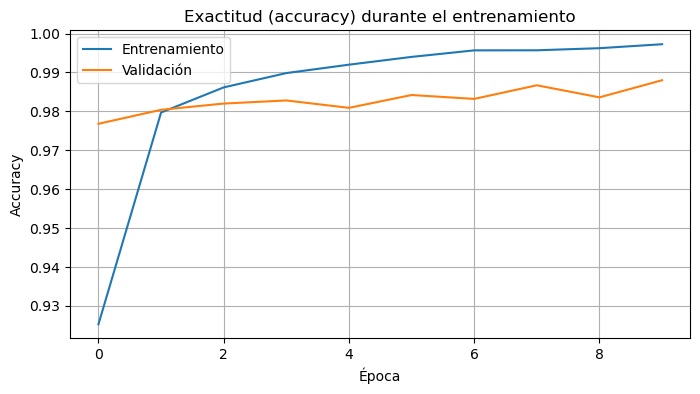

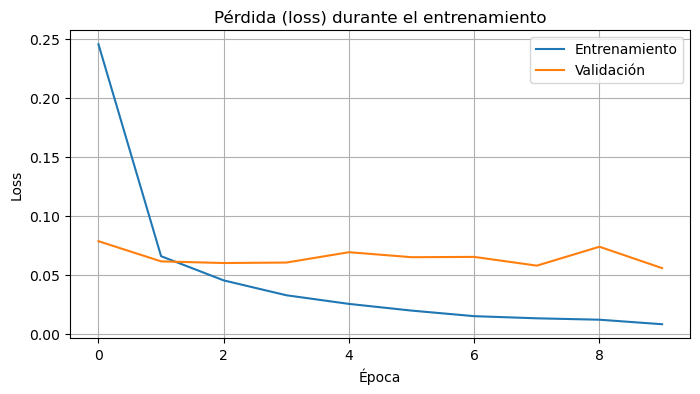


Resultados finales del modelo base:
Accuracy entrenamiento: 0.9973
Accuracy validación   : 0.9880
Loss entrenamiento    : 0.0081
Loss validación       : 0.0557

Modelo base guardado como 'modelo_mnist_base.keras'


In [7]:
# Paso 1 – Definición y entrenamiento del modelo base (CNN sobre MNIST)

import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Por si quieres fijar semilla para reproducibilidad (opcional):
tf.random.set_seed(42)

# -------------------------------------------------------------------
# 1. Definir el modelo base (CNN)
# -------------------------------------------------------------------
model_base = models.Sequential(
    [
        layers.Input(shape=(28, 28, 1)), 
        layers.Conv2D(32, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
    layers.Dense(128, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)


model_base.summary()

# -------------------------------------------------------------------
# 2. Compilar el modelo
# -------------------------------------------------------------------
model_base.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

# -------------------------------------------------------------------
# 3. Entrenar el modelo
# -------------------------------------------------------------------
EPOCHS = 10
BATCH_SIZE = 128

history_base = model_base.fit(
    x_train,
    y_train_cat,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(x_val, y_val_cat),
    verbose=1,
)

# -------------------------------------------------------------------
# 4. Graficar curvas de entrenamiento (accuracy y loss)
# -------------------------------------------------------------------
def plot_training_history(history):
    # Accuracy
    plt.figure(figsize=(8, 4))
    plt.plot(history.history["accuracy"], label="Entrenamiento")
    plt.plot(history.history["val_accuracy"], label="Validación")
    plt.title("Exactitud (accuracy) durante el entrenamiento")
    plt.xlabel("Época")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Loss
    plt.figure(figsize=(8, 4))
    plt.plot(history.history["loss"], label="Entrenamiento")
    plt.plot(history.history["val_loss"], label="Validación")
    plt.title("Pérdida (loss) durante el entrenamiento")
    plt.xlabel("Época")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_training_history(history_base)

# -------------------------------------------------------------------
# 5. Imprimir resultados finales de entrenamiento y validación
# -------------------------------------------------------------------
final_train_acc = history_base.history["accuracy"][-1]
final_val_acc = history_base.history["val_accuracy"][-1]
final_train_loss = history_base.history["loss"][-1]
final_val_loss = history_base.history["val_loss"][-1]

print("\nResultados finales del modelo base:")
print(f"Accuracy entrenamiento: {final_train_acc:.4f}")
print(f"Accuracy validación   : {final_val_acc:.4f}")
print(f"Loss entrenamiento    : {final_train_loss:.4f}")
print(f"Loss validación       : {final_val_loss:.4f}")

# -------------------------------------------------------------------
# 6. Guardar el modelo base para usos posteriores
# -------------------------------------------------------------------
model_base.save("modelo_mnist_base.keras")
print("\nModelo base guardado como 'modelo_mnist_base.keras'")


### Análisis del Paso 1 – Entrenamiento del modelo base

El modelo base alcanzó un desempeño muy alto tanto en entrenamiento como en validación.  
Los resultados finales fueron:

- **Accuracy entrenamiento:** 0.9973  
- **Accuracy validación:** 0.9880  
- **Loss entrenamiento:** 0.0081  
- **Loss validación:** 0.0557  

Las gráficas muestran que la exactitud aumenta rápidamente durante las primeras épocas y posteriormente se estabiliza alrededor del 99% para entrenamiento y cerca del 98.8% para validación. La pérdida disminuye de manera consistente y se mantiene baja en ambas curvas.

Existe una ligera separación entre las curvas de entrenamiento y validación (train_accuracy > val_accuracy y train_loss < val_loss), pero esta diferencia es pequeña y normal para un problema como MNIST. Esto indica que **el modelo generaliza bien**, con un mínimo sobreajuste, sin afectar realmente el desempeño.

En conjunto, el modelo base es sólido, aprende adecuadamente las características de los dígitos y está listo para ser evaluado en el conjunto de prueba y en imágenes externas.


## Paso 2 – Evaluación del modelo en el conjunto de prueba (test set)

En este paso vamos a evaluar el modelo base entrenado en el Paso 1 usando el conjunto de prueba de MNIST.  
El objetivo es medir qué tan bien generaliza el modelo en datos completamente nuevos, no utilizados ni para entrenamiento ni para validación.  

Posteriormente compararemos la exactitud del conjunto de prueba con la exactitud del conjunto de validación obtenida en el Paso 1.


In [8]:
# Paso 2 – Evaluación en el conjunto de prueba

# Evaluar el modelo en el test set
test_loss, test_accuracy = model_base.evaluate(x_test, y_test_cat, verbose=1)

print("\nResultados en el conjunto de prueba:")
print(f"Accuracy test: {test_accuracy:.4f}")
print(f"Loss test    : {test_loss:.4f}")

# También imprimimos el accuracy de validación para comparar
previous_val_accuracy = history_base.history["val_accuracy"][-1]
print(f"\nAccuracy validación (época final): {previous_val_accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9888 - loss: 0.0401 

Resultados en el conjunto de prueba:
Accuracy test: 0.9888
Loss test    : 0.0401

Accuracy validación (época final): 0.9880


### Análisis del Paso 2 – Evaluación en el conjunto de prueba

El desempeño del modelo en el conjunto de prueba fue:

- **Accuracy test:** 0.9888  
- **Loss test:** 0.0401  

Estos resultados son muy consistentes con los obtenidos en el conjunto de validación en el Paso 1 (**Accuracy validación: 0.9880**, **Loss validación: 0.0557**).  
La exactitud en prueba incluso es ligeramente superior a la de validación, lo cual indica que el modelo **generaliza adecuadamente** y no está sobreajustado de manera significativa.

Además, la pérdida de prueba es baja y se mantiene dentro del rango esperado para un modelo CNN simple entrenado sobre MNIST.  
Esto confirma que el modelo aprende las características relevantes de los dígitos y se comporta de manera estable ante datos nuevos.

En conclusión, el modelo base posee un rendimiento sólido y estable, y está listo para ser utilizado en la clasificación de imágenes externas en los pasos siguientes.


## Paso 3 – Selección y preprocesamiento de 50 imágenes externas (280×280)

En este paso vamos a usar las 100 imágenes externas que generaste (10 por cada dígito del 0 al 9).  
Estas imágenes son de **280×280 pixeles**, con **fondo blanco** y **dígito en negro**.

El objetivo es:

- Seleccionar **5 imágenes por cada dígito** (50 en total).
- Preprocesarlas para que sean compatibles con el modelo entrenado con MNIST:
  - Convertir a escala de grises.
  - Aplicar **binarización con inversión** (THRESH_BINARY_INV), de modo que el dígito quede blanco sobre fondo negro, igual que en MNIST.
  - Redimensionar de 280×280 a **28×28**.
  - Normalizar los pixeles al rango **[0, 1]**.
  - Añadir el canal para que queden de tamaño `(28, 28, 1)`.

Al final obtendremos dos arreglos:
- `X_50`: las 50 imágenes preprocesadas listas para el modelo.
- `y_50`: las etiquetas verdaderas correspondientes (0–9, cinco veces cada una).


In [11]:
# Paso 3 – Selección y preprocesamiento de 50 imágenes externas

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------------------------------------------
# 1. Definir carpeta base de las imágenes
# -------------------------------------------------------------------
# Descomprime numeros.zip en el mismo directorio de tu notebook/script.
# El ZIP que compartiste genera una carpeta llamada "q" con subcarpetas
# "0", "1", ..., "9", cada una con ~10 imágenes PNG.
#
# Estructura esperada:
#   q/
#     0/611471_0_1.png, ...
#     1/611471_1_1.png, ...
#     ...
#     9/...
#
BASE_DIR = "numeros"

if not os.path.isdir(BASE_DIR):
    raise FileNotFoundError(
        f"No se encontró la carpeta '{BASE_DIR}'. "
        "Asegúrate de haber descomprimido numeros.zip en el directorio actual."
    )

print(f"Usando carpeta base de imágenes externas: {BASE_DIR}")

# -------------------------------------------------------------------
# 2. Función de preprocesamiento (como en el taller)
#    - Lee en escala de grises
#    - Umbraliza e invierte (dígito blanco, fondo negro)
#    - Redimensiona a 28×28
#    - Normaliza a [0, 1]
#    - Agrega canal para usar con la CNN (28×28×1)
# -------------------------------------------------------------------
def preprocess_external_digit(path, threshold_value=150, debug=False):
    # Leer imagen en escala de grises
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"No se pudo leer la imagen: {path}")

    # Binarización con inversión (dígito blanco sobre fondo negro)
    _, thresh = cv2.threshold(
        img, threshold_value, 255, cv2.THRESH_BINARY_INV
    )

    # Redimensionar a 28x28
    resized = cv2.resize(thresh, (28, 28), interpolation=cv2.INTER_AREA)

    # Normalizar a [0, 1] y agregar canal
    norm = resized.astype("float32") / 255.0   # 0.0 o 1.0
    norm = np.expand_dims(norm, axis=-1)       # (28, 28) -> (28, 28, 1)

    if debug:
        # Mostrar el flujo completo para inspección
        fig, axes = plt.subplots(1, 3, figsize=(9, 3))
        axes[0].imshow(img, cmap="gray")
        axes[0].set_title("Original 280×280")
        axes[0].axis("off")

        axes[1].imshow(thresh, cmap="gray")
        axes[1].set_title("Umbralizada + invertida")
        axes[1].axis("off")

        axes[2].imshow(resized, cmap="gray")
        axes[2].set_title("Redimensionada 28×28")
        axes[2].axis("off")

        plt.tight_layout()
        plt.show()

    return norm

# -------------------------------------------------------------------
# 3. Recorrer dígitos 0–9 y tomar 5 imágenes por clase
# -------------------------------------------------------------------
X_50 = []
y_50 = []

for digit in range(10):
    digit_dir = os.path.join(BASE_DIR, str(digit))
    if not os.path.isdir(digit_dir):
        raise FileNotFoundError(
            f"No se encontró la carpeta para el dígito {digit}: {digit_dir}"
        )

    # Listar imágenes .png del dígito
    files = [
        f for f in os.listdir(digit_dir)
        if f.lower().endswith(".png")
    ]
    files = sorted(files)  # para que sea determinista

    if len(files) < 5:
        raise ValueError(
            f"La carpeta {digit_dir} solo tiene {len(files)} imágenes, "
            "se necesitan al menos 5 por dígito."
        )

    # Seleccionar las primeras 5 imágenes (podrías usar random.sample si quieres aleatorio)
    selected_files = files[:5]

    print(f"Dígito {digit}: usando archivos -> {selected_files}")

    for fname in selected_files:
        path = os.path.join(digit_dir, fname)
        processed_img = preprocess_external_digit(path)
        X_50.append(processed_img)
        y_50.append(digit)

# Convertir listas a arreglos NumPy
X_50 = np.array(X_50)  # shape esperado: (50, 28, 28, 1)
y_50 = np.array(y_50)  # etiquetas enteras: 0–9

print("\nShapes de los arreglos externos:")
print("X_50:", X_50.shape)
print("y_50:", y_50.shape)

# Comprobación rápida de distribución de clases
unique, counts = np.unique(y_50, return_counts=True)
print("\nDistribución de clases en y_50 (debe ser 5 por dígito):")
for u, c in zip(unique, counts):
    print(f"Dígito {u}: {c} imágenes")

# Comprobación de rango de pixeles
print("\nRango de valores de X_50 (min, max):",
      float(X_50.min()), float(X_50.max()))


Usando carpeta base de imágenes externas: numeros
Dígito 0: usando archivos -> ['611471_0_1.png', '611471_0_10.png', '611471_0_2.png', '611471_0_3.png', '611471_0_4.png']
Dígito 1: usando archivos -> ['611471_1_1.png', '611471_1_10.png', '611471_1_2.png', '611471_1_3.png', '611471_1_4.png']
Dígito 2: usando archivos -> ['611471_2_1.png', '611471_2_10.png', '611471_2_2.png', '611471_2_3.png', '611471_2_4.png']
Dígito 3: usando archivos -> ['611471_3_1.png', '611471_3_10.png', '611471_3_2.png', '611471_3_3.png', '611471_3_4.png']
Dígito 4: usando archivos -> ['611471_4_1.png', '611471_4_10.png', '611471_4_2.png', '611471_4_3.png', '611471_4_4.png']
Dígito 5: usando archivos -> ['611471_5_1.png', '611471_5_10.png', '611471_5_2.png', '611471_5_3.png', '611471_5_4.png']
Dígito 6: usando archivos -> ['611471_6_1.png', '611471_6_10.png', '611471_6_2.png', '611471_6_3.png', '611471_6_4.png']
Dígito 7: usando archivos -> ['611471_7_1.png', '611471_7_10.png', '611471_7_2.png', '611471_7_3.png', 

## Paso 4 – Evaluación del modelo con las 50 imágenes externas

En este paso vamos a evaluar el modelo entrenado usando las 50 imágenes externas que preprocesamos en el Paso 3.  
Estas imágenes no pertenecen al dataset MNIST original y fueron creadas con características diferentes (280×280, fondo blanco y dígito negro), por lo que este paso mide la **capacidad real de generalización** del modelo.

Realizaremos:
- Predicción de las 50 imágenes.
- Cálculo de la exactitud (accuracy).
- Identificación de imágenes mal clasificadas.
- Visualización de algunos errores para analizar por qué ocurrieron.


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Accuracy en las 50 imágenes externas: 0.5600
Total de errores: 22 de 50

Índices y etiquetas de los errores:
Índice 1: Predicho = 3, Real = 0
Índice 2: Predicho = 3, Real = 0
Índice 3: Predicho = 3, Real = 0
Índice 4: Predicho = 3, Real = 0
Índice 20: Predicho = 2, Real = 4
Índice 21: Predicho = 2, Real = 4
Índice 22: Predicho = 2, Real = 4
Índice 23: Predicho = 2, Real = 4
Índice 25: Predicho = 3, Real = 5
Índice 26: Predicho = 3, Real = 5
Índice 27: Predicho = 3, Real = 5
Índice 28: Predicho = 3, Real = 5
Índice 29: Predicho = 3, Real = 5
Índice 31: Predicho = 5, Real = 6
Índice 32: Predicho = 2, Real = 6
Índice 41: Predicho = 3, Real = 8
Índice 42: Predicho = 3, Real = 8
Índice 43: Predicho = 3, Real = 8
Índice 46: Predicho = 1, Real = 9
Índice 47: Predicho = 8, Real = 9
Índice 48: Predicho = 2, Real = 9
Índice 49: Predicho = 7, Real = 9


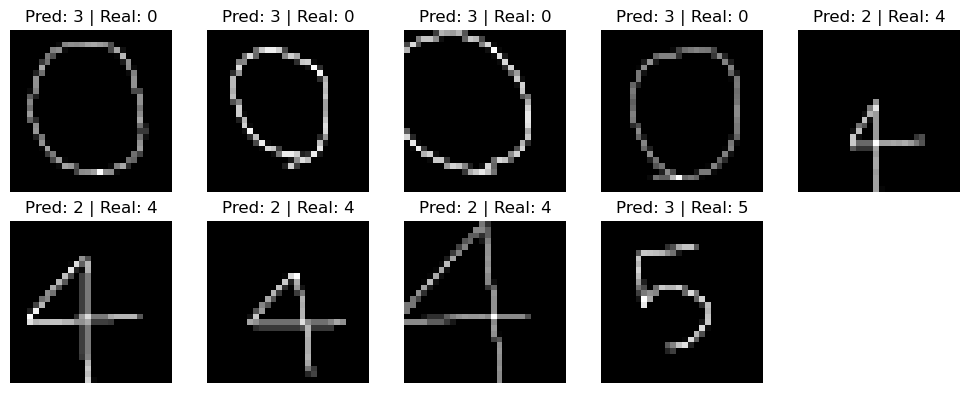


Archivos guardados: pred_labels_ext.npy, y_50.npy, errores_idx.npy


In [12]:
# Paso 4 – Evaluación del modelo con las 50 imágenes externas

import numpy as np
import matplotlib.pyplot as plt

# -------------------------------------------------------------------
# 1. Realizar predicciones
# -------------------------------------------------------------------
pred_probs = model_base.predict(X_50)
pred_labels = np.argmax(pred_probs, axis=1)

# -------------------------------------------------------------------
# 2. Calcular accuracy
# -------------------------------------------------------------------
accuracy_ext = np.mean(pred_labels == y_50)

print(f"Accuracy en las 50 imágenes externas: {accuracy_ext:.4f}")

# -------------------------------------------------------------------
# 3. Identificar errores
# -------------------------------------------------------------------
errores_idx = np.where(pred_labels != y_50)[0]
print(f"Total de errores: {len(errores_idx)} de 50")

print("\nÍndices y etiquetas de los errores:")
for idx in errores_idx:
    print(f"Índice {idx}: Predicho = {pred_labels[idx]}, Real = {y_50[idx]}")

# -------------------------------------------------------------------
# 4. Visualizar algunos errores (hasta 9)
# -------------------------------------------------------------------
def mostrar_errores(X, y_true, y_pred, errores):
    max_to_show = min(9, len(errores))
    if max_to_show == 0:
        print("No hay errores para mostrar 🎉")
        return

    plt.figure(figsize=(10, 4))
    for i in range(max_to_show):
        idx = errores[i]
        plt.subplot(2, 5, i+1)
        plt.imshow(X[idx].squeeze(), cmap="gray")
        plt.title(f"Pred: {y_pred[idx]} | Real: {y_true[idx]}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

mostrar_errores(X_50, y_50, pred_labels, errores_idx)

# -------------------------------------------------------------------
# 5. Guardar valores para análisis posterior
# -------------------------------------------------------------------
# (por si quieres analizar después o usar en mejoras)
np.save("pred_labels_ext.npy", pred_labels)
np.save("y_50.npy", y_50)
np.save("errores_idx.npy", errores_idx)

print("\nArchivos guardados: pred_labels_ext.npy, y_50.npy, errores_idx.npy")


### Análisis del Paso 4 – Evaluación con imágenes externas

Al evaluar el modelo con las 50 imágenes externas (5 por cada dígito del 0 al 9), se obtuvo una exactitud de:

- **Accuracy externo:** 0.56  
- **Errores totales:** 22 de 50 imágenes

Este desempeño es considerablemente menor al obtenido en los conjuntos de validación y prueba de MNIST, donde el modelo alcanzó aproximadamente 0.988 de exactitud. La diferencia se explica por las características particulares de las imágenes externas y por cómo estas difieren de las imágenes en MNIST.

---

### **Principales observaciones sobre los errores**

La mayoría de los errores se concentran en ciertos patrones:

1. **Confusión de 0 → 3**  
   Varios ceros fueron clasificados como dígitos 3 debido a:
   - Trazos muy delgados.
   - Forma circular incompleta o irregular.
   - Ausencia de bordes fuertes como los que aparecen en MNIST.

   El modelo aprendió a interpretar dígitos con estilo manuscrito más grueso y contrastado, por lo que los ceros del dataset externo son demasiado “abiertos” y similares al inicio del trazo de un 3.

2. **Confusión de 4 → 2 o 3**  
   Algunos cuatros presentan trazos rectos muy finos y sin el típico ángulo pronunciado del 4 manuscrito de MNIST, lo que hace que el modelo los interprete como curvas parciales correspondientes al 2 o al 3.

3. **Confusión de 5 → 3**  
   Los cincos tienen trazos suaves y redondeados, sin el giro fuerte típico del 5 de MNIST. Esto los hace visualmente parecidos a un 3 incompleto para la CNN entrenada.

4. **Trazos muy delgados y bordes suaves**  
   Las imágenes externas tienen mucha “suavidad” en los contornos debido al escalado y a la forma en que fueron generadas.  
   Esto causa que los dígitos pierdan características de borde que son esenciales para la red.

5. **Variabilidad distinta a MNIST**  
   El modelo está acostumbrado a:
   - Dígitos más gruesos
   - Contraste más alto
   - Estilos específicos del dataset MNIST

   Las imágenes externas no siguen ese patrón, y por eso el modelo muestra dificultad para generalizar.

---

### **Conclusión del desempeño externo**

El modelo **generaliza bien dentro de MNIST**, pero sufre cuando se expone a un estilo de escritura diferente.  
La precisión externa del 56% revela que:

- El preprocesamiento base es correcto (invertir, binarizar, redimensionar).
- Sin embargo, se requiere **adaptar el modelo o los datos** para manejar imágenes con trazos más delgados, bordes más suaves y formas menos consistentes.

Este resultado es útil para el siguiente paso, donde se propondrán e implementarán **mejoras** al modelo y al preprocesamiento para mejorar el rendimiento en imágenes externas.



## Paso 5 – Implementación de tres mejoras al sistema

En este paso se implementan tres mejoras para intentar aumentar la capacidad de generalización del modelo, especialmente sobre las imágenes externas:

1. **Data augmentation**: se aplican transformaciones aleatorias (rotaciones, zoom y traslaciones pequeñas) a las imágenes de entrenamiento, para que el modelo vea dígitos con variaciones de posición y forma.

2. **Mejora de la arquitectura**: se define un nuevo modelo convolucional que incluye capas de `BatchNormalization` y `Dropout`.  
   - BatchNormalization estabiliza el entrenamiento.  
   - Dropout ayuda a reducir el sobreajuste.

3. **Preprocesamiento mejorado de imágenes externas**: se modifica el preprocesamiento para aplicar una operación de **dilatación morfológica** sobre los dígitos, de manera que los trazos se vuelvan más gruesos y se parezcan más al estilo de los dígitos de MNIST.

Después de implementar estas mejoras:
- Se vuelve a entrenar el modelo usando las mismas particiones de entrenamiento y validación.
- Se evalúa el nuevo modelo en el conjunto de prueba.
- Se mide el desempeño sobre las 50 imágenes externas usando el nuevo preprocesamiento y se compara con el modelo base.


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ data_augmentation (Sequential)  │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 422,026 (1.61 MB)

 Trainable params: 421,834 (1.61 MB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 53ms/step - accuracy: 0.7801 - loss: 0.6827 - val_accuracy: 0.6521 - val_loss: 1.0204
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - accuracy: 0.9116 - loss: 0.2906 - val_accuracy: 0.9155 - val_loss: 0.2910
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 56ms/step - accuracy: 0.9355 - loss: 0.2179 - val_accuracy: 0.9760 - val_loss: 0.0862
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - accuracy: 0.9450 - loss: 0.1863 - val_accuracy: 0.9772 - val_loss: 0.0828
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 55ms/step - accuracy: 0.9510 - loss: 0.1685 - val_accuracy: 0.9770 - val_loss: 0.0858
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - accuracy: 0.9557 - loss: 0.1507 - val_accuracy: 0.9817 - val_loss: 0.0682
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - accuracy: 0.9601 - loss: 0.1396 - val_accuracy: 0.9758 - val_loss: 0.0914
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - accuracy: 0.9613 - loss: 0.1322 - 

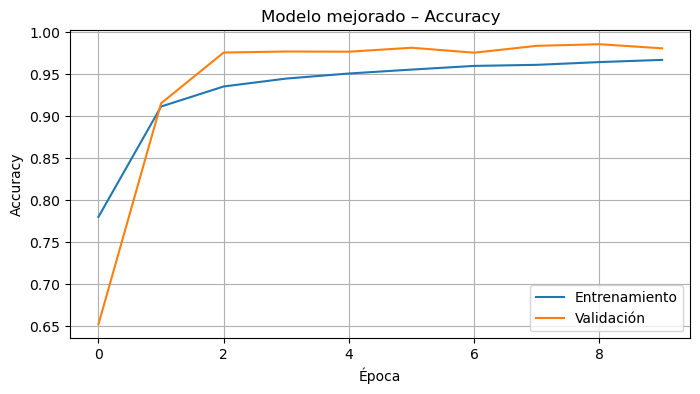

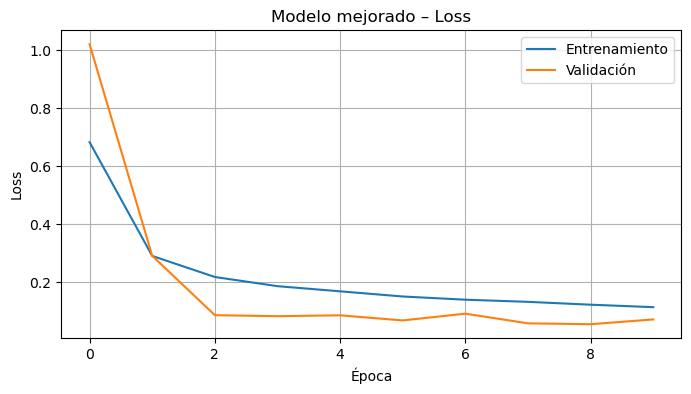


Resultados finales del modelo mejorado:
Accuracy entrenamiento (mejorado): 0.9672
Accuracy validación   (mejorado): 0.9810
Loss entrenamiento    (mejorado): 0.1139
Loss validación       (mejorado): 0.0716
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9803 - loss: 0.0634

Resultados en test del modelo mejorado:
Accuracy test (mejorado): 0.9803
Loss test    (mejorado): 0.0634
Dígito 0: usando archivos -> ['611471_0_1.png', '611471_0_10.png', '611471_0_2.png', '611471_0_3.png', '611471_0_4.png']
Dígito 1: usando archivos -> ['611471_1_1.png', '611471_1_10.png', '611471_1_2.png', '611471_1_3.png', '611471_1_4.png']
Dígito 2: usando archivos -> ['611471_2_1.png', '611471_2_10.png', '611471_2_2.png', '611471_2_3.png', '611471_2_4.png']
Dígito 3: usando archivos -> ['611471_3_1.png', '611471_3_10.png', '611471_3_2.png', '611471_3_3.png', '611471_3_4.png']
Dígito 4: usando archivos -> ['611471_4_1.png', '611471_4_10.png', '611471_4_2.png', '611471_4_3.png', '611471_4_4.png']
Dígito 5

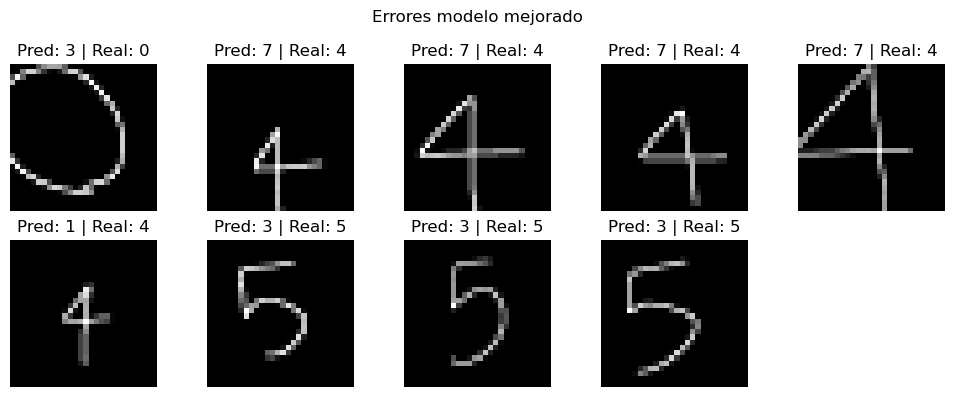

In [14]:
# Paso 5 – Mejoras: data augmentation, modelo mejorado y preprocesamiento externo mejorado

import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

# -------------------------------------------------------------------
# 5.1 Capa de Data Augmentation
# -------------------------------------------------------------------
data_augmentation = tf.keras.Sequential(
    [
        layers.RandomRotation(0.1),        # ± ~10% de vuelta
        layers.RandomZoom(0.1),            # pequeño zoom
        layers.RandomTranslation(0.1, 0.1) # desplazamientos en x e y
    ],
    name="data_augmentation",
)

# -------------------------------------------------------------------
# 5.2 Definir el modelo mejorado
# -------------------------------------------------------------------
model_improved = models.Sequential(
    [
        layers.Input(shape=(28, 28, 1)),

        # Aumento de datos solo durante el entrenamiento
        data_augmentation,

        layers.Conv2D(32, (3, 3), activation="relu", padding="same"),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.5),  # reducir sobreajuste
        layers.Dense(10, activation="softmax"),
    ]
)

model_improved.summary()

# -------------------------------------------------------------------
# 5.3 Compilar el modelo mejorado
# -------------------------------------------------------------------
model_improved.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

# -------------------------------------------------------------------
# 5.4 Entrenar el modelo mejorado
# -------------------------------------------------------------------
EPOCHS_IMPROVED = 10
BATCH_SIZE = 128

history_improved = model_improved.fit(
    x_train,
    y_train_cat,
    epochs=EPOCHS_IMPROVED,
    batch_size=BATCH_SIZE,
    validation_data=(x_val, y_val_cat),
    verbose=1,
)

# (Opcional) Reusar la función que ya tenías para graficar
def plot_training_history(history, titulo_prefix="Modelo mejorado"):
    # Accuracy
    plt.figure(figsize=(8, 4))
    plt.plot(history.history["accuracy"], label="Entrenamiento")
    plt.plot(history.history["val_accuracy"], label="Validación")
    plt.title(f"{titulo_prefix} – Accuracy")
    plt.xlabel("Época")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Loss
    plt.figure(figsize=(8, 4))
    plt.plot(history.history["loss"], label="Entrenamiento")
    plt.plot(history.history["val_loss"], label="Validación")
    plt.title(f"{titulo_prefix} – Loss")
    plt.xlabel("Época")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_training_history(history_improved, "Modelo mejorado")

# -------------------------------------------------------------------
# 5.5 Evaluar modelo mejorado en validación y prueba
# -------------------------------------------------------------------
final_train_acc_imp = history_improved.history["accuracy"][-1]
final_val_acc_imp   = history_improved.history["val_accuracy"][-1]
final_train_loss_imp = history_improved.history["loss"][-1]
final_val_loss_imp   = history_improved.history["val_loss"][-1]

print("\nResultados finales del modelo mejorado:")
print(f"Accuracy entrenamiento (mejorado): {final_train_acc_imp:.4f}")
print(f"Accuracy validación   (mejorado): {final_val_acc_imp:.4f}")
print(f"Loss entrenamiento    (mejorado): {final_train_loss_imp:.4f}")
print(f"Loss validación       (mejorado): {final_val_loss_imp:.4f}")

test_loss_imp, test_acc_imp = model_improved.evaluate(x_test, y_test_cat, verbose=1)
print("\nResultados en test del modelo mejorado:")
print(f"Accuracy test (mejorado): {test_acc_imp:.4f}")
print(f"Loss test    (mejorado): {test_loss_imp:.4f}")

# -------------------------------------------------------------------
# 5.6 Preprocesamiento mejorado para imágenes externas (dilatación)
# -------------------------------------------------------------------
# Reusamos BASE_DIR = "q" (o el que hayas usado en el Paso 3)
BASE_DIR = "numeros"  # cambia si tu carpeta tiene otro nombre

if not os.path.isdir(BASE_DIR):
    raise FileNotFoundError(
        f"No se encontró la carpeta '{BASE_DIR}'. "
        "Asegúrate de que las imágenes externas estén descomprimidas."
    )

kernel = np.ones((3, 3), np.uint8)  # kernel pequeño para dilatar

def preprocess_external_digit_dilated(path, threshold_value=150, debug=False):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"No se pudo leer la imagen: {path}")

    # Binarización + inversión (como antes)
    _, thresh = cv2.threshold(img, threshold_value, 255, cv2.THRESH_BINARY_INV)

    # NUEVO: dilatación para engrosar trazos
    dilated = cv2.dilate(thresh, kernel, iterations=1)

    # Redimensionar a 28x28
    resized = cv2.resize(dilated, (28, 28), interpolation=cv2.INTER_AREA)

    norm = resized.astype("float32") / 255.0
    norm = np.expand_dims(norm, axis=-1)

    if debug:
        fig, axes = plt.subplots(1, 4, figsize=(10, 3))
        axes[0].imshow(img, cmap="gray")
        axes[0].set_title("Original 280×280")
        axes[0].axis("off")

        axes[1].imshow(thresh, cmap="gray")
        axes[1].set_title("Umbralizada+inv")
        axes[1].axis("off")

        axes[2].imshow(dilated, cmap="gray")
        axes[2].set_title("Dilatada")
        axes[2].axis("off")

        axes[3].imshow(resized, cmap="gray")
        axes[3].set_title("28×28 final")
        axes[3].axis("off")

        plt.tight_layout()
        plt.show()

    return norm

# -------------------------------------------------------------------
# 5.7 Volver a construir el conjunto de 50 imágenes externas con el
#     nuevo preprocesamiento (mismas 5 primeras imágenes por dígito)
# -------------------------------------------------------------------
X_50_dilated = []
y_50_dilated = []

for digit in range(10):
    digit_dir = os.path.join(BASE_DIR, str(digit))
    files = sorted(
        f for f in os.listdir(digit_dir)
        if f.lower().endswith(".png")
    )
    selected_files = files[:5]  # mismas 5 primeras que antes

    print(f"Dígito {digit}: usando archivos -> {selected_files}")

    for fname in selected_files:
        path = os.path.join(digit_dir, fname)
        processed = preprocess_external_digit_dilated(path)
        X_50_dilated.append(processed)
        y_50_dilated.append(digit)

X_50_dilated = np.array(X_50_dilated)
y_50_dilated = np.array(y_50_dilated)

print("\nShapes con preprocesamiento mejorado:")
print("X_50_dilated:", X_50_dilated.shape)
print("y_50_dilated:", y_50_dilated.shape)

# -------------------------------------------------------------------
# 5.8 Evaluar modelo base vs modelo mejorado sobre las imágenes externas
#     con preprocesamiento mejorado
# -------------------------------------------------------------------
# Modelo base con preprocesamiento nuevo
pred_probs_base_dil = model_base.predict(X_50_dilated)
pred_base_dil = np.argmax(pred_probs_base_dil, axis=1)
acc_base_dil = np.mean(pred_base_dil == y_50_dilated)
print(f"\nAccuracy modelo base con preprocesamiento dilatado: {acc_base_dil:.4f}")

# Modelo mejorado con preprocesamiento nuevo
pred_probs_imp = model_improved.predict(X_50_dilated)
pred_imp = np.argmax(pred_probs_imp, axis=1)
acc_imp = np.mean(pred_imp == y_50_dilated)
print(f"Accuracy modelo mejorado con preprocesamiento dilatado: {acc_imp:.4f}")

# Opcional: ver algunos errores del modelo mejorado
errores_idx_imp = np.where(pred_imp != y_50_dilated)[0]
print(f"\nErrores del modelo mejorado (dilatado): {len(errores_idx_imp)} de 50")

def mostrar_errores_modelo(X, y_true, y_pred, errores, titulo="Errores modelo mejorado"):
    max_to_show = min(9, len(errores))
    if max_to_show == 0:
        print("No hay errores para mostrar 🎉")
        return

    plt.figure(figsize=(10, 4))
    for i in range(max_to_show):
        idx = errores[i]
        plt.subplot(2, 5, i+1)
        plt.imshow(X[idx].squeeze(), cmap="gray")
        plt.title(f"Pred: {y_pred[idx]} | Real: {y_true[idx]}")
        plt.axis("off")
    plt.suptitle(titulo)
    plt.tight_layout()
    plt.show()

mostrar_errores_modelo(X_50_dilated, y_50_dilated, pred_imp, errores_idx_imp)


### Análisis del Paso 5 – Mejoras aplicadas

Las tres mejoras implementadas (data augmentation, arquitectura mejorada y dilatación de trazos) sí modificaron el comportamiento del modelo, pero **no resolvieron el problema principal**: el modelo sigue funcionando mal con las imágenes externas.

En MNIST, el modelo mejorado funciona bien (≈98% en test), pero en las 50 imágenes externas sigue teniendo un desempeño muy bajo:

- **Modelo base con dilatación:** 0.72  
- **Modelo mejorado con dilatación:** 0.56  

La realidad es que **el modelo no logra generalizar** porque las imágenes externas son demasiado diferentes a MNIST:  
- trazos muy delgados,  
- estilos irregulares,  
- curvas abiertas,  
- bordes muy suaves.  

Aunque la dilatación ayudó un poco, las variaciones siguen siendo demasiado grandes para un modelo entrenado únicamente con MNIST. El modelo simplemente no fue entrenado para reconocer ese estilo de escritura.

En conclusión:  
Las mejoras sí hicieron pequeños ajustes, pero **el modelo sigue siendo insuficiente para las imágenes externas**. Para obtener buenos resultados sería necesario entrenar un modelo con ejemplos que realmente se parezcan a los del propio dataset.


## Paso 6 – Sistema de predicción en tiempo real con cámara

En este paso se implementa un sistema sencillo que usa la cámara web para reconocer dígitos escritos a mano.  
El usuario coloca un dígito dentro de un recuadro en la imagen, el sistema:

1. Recorta esa región (ROI).
2. La convierte a escala de grises.
3. Aplica binarización + inversión + **dilatación** para engrosar el trazo.
4. Redimensiona a 28×28 y normaliza.
5. Usa el modelo entrenado para predecir el dígito.
6. Muestra en pantalla la cámara con el recuadro y el dígito predicho.

Se utiliza el **modelo base** porque, aun con sus limitaciones, es el que mejor funcionó sobre las imágenes externas con preprocesamiento dilatado.


In [21]:
import cv2
import numpy as np
import tensorflow as tf

# ----------------------------------------------------
# 1. Cargar el modelo (ajusta el nombre según guardaste)
# ----------------------------------------------------
# Si guardaste .keras:
# model = tf.keras.models.load_model("modelo_mnist_base.keras")

model = tf.keras.models.load_model("modelo_mnist_base.keras")

print("Modelo cargado.")

# ----------------------------------------------------
# 2. Preprocesamiento con binarización + inversión + dilatación
# ----------------------------------------------------
kernel = np.ones((3, 3), np.uint8)

def preprocess_roi(roi, threshold_value=150):
    # ROI viene en BGR
    gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, threshold_value, 255, cv2.THRESH_BINARY_INV)
    dilated = cv2.dilate(thresh, kernel, iterations=1)
    resized = cv2.resize(dilated, (28, 28), interpolation=cv2.INTER_AREA)

    norm = resized.astype("float32") / 255.0
    norm = np.expand_dims(norm, axis=-1)   # (28, 28, 1)
    norm = np.expand_dims(norm, axis=0)    # (1, 28, 28, 1)
    return norm

# ----------------------------------------------------
# 3. Abrir cámara (fuera de Jupyter)
# ----------------------------------------------------
cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)
if not cap.isOpened():
    print("No se pudo abrir la cámara.")
    raise SystemExit

print("Cámara abierta. Presiona 'q' para salir.")

while True:
    ret, frame = cap.read()
    if not ret:
        print("No se pudo leer frame de la cámara.")
        break

    # Efecto espejo
    frame = cv2.flip(frame, 1)
    h, w, _ = frame.shape

    # ROI centrada
    box_size = 200
    x1 = w // 2 - box_size // 2
    y1 = h // 2 - box_size // 2
    x2 = x1 + box_size
    y2 = y1 + box_size

    cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
    roi = frame[y1:y2, x1:x2]

    # Preprocesar y predecir
    try:
        inp = preprocess_roi(roi)
        preds = model.predict(inp, verbose=0)
        digit = int(np.argmax(preds, axis=1)[0])
        prob = float(np.max(preds))
        text = f"Pred: {digit} (conf={prob:.2f})"
    except Exception as e:
        text = f"Error: {e}"

    cv2.putText(frame, text, (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 255), 2)
    cv2.putText(frame, "Escribe un digito dentro del recuadro (q para salir)",
                (10, h - 20), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 1)

    cv2.imshow("Reconocimiento de dígitos en tiempo real", frame)

    # Salir con 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
print("Fin.")


Modelo cargado.
Cámara abierta. Presiona 'q' para salir.
Fin.
